In [13]:
import pandas as pd
import os

In [14]:
pwd

'/Users/faustina/METIS/BOOTCAMPWORK/Project 3/stress_productivity/notebooks'

In [15]:
df = pd.read_csv('../data/stress_productivity_df.csv', index_col='Unnamed: 0')
df.head()

,Participant_ID,Group,Age,Gender,Nationality,Native_Language,Education,Writing_Proficiency,Daily_Email_Frequency,BFI_Agreeableness,...,Treatment,Treatment_Time,Task,PP_QC,EDA_QC,BR_QC,Chest_HR_QC,Wrist_HR_QC,RR_QC,Is_Stressed
0,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,RB,0,Not Applicable,0.003544,0.311345,12.2,83.0,85.78,705.0,1
1,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,RB,1,Not Applicable,0.003543,0.310063,12.8,82.0,85.80,731.0,1
2,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,RB,2,Not Applicable,0.003541,0.309743,12.8,81.0,85.83,704.0,1
3,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,RB,3,Not Applicable,0.003539,0.309743,13.3,79.0,85.83,719.0,1
4,T003,CH,23.0,2,1.0,1.0,2.0,7.0,6.0,40.0,...,RB,4,Not Applicable,0.003537,0.309743,13.3,82.0,85.83,733.0,1


In [16]:
df.columns

Index(['Participant_ID', 'Group', 'Age', 'Gender', 'Nationality',
       'Native_Language', 'Education', 'Writing_Proficiency',
       'Daily_Email_Frequency', 'BFI_Agreeableness', 'BFI_Conscientiousness',
       'BFI_Extraversion', 'BFI_Neuroticism', 'BFI_Openness',
       'ERQ_Cognitive_Reappraisal', 'ERQ_Expressive_Suppression',
       'Perceived_Stress_Scale', 'NASA_Mental_Demand', 'NASA_Physical_Demand',
       'NASA_Temporal_Demand', 'NASA_Performance', 'NASA_Effort',
       'NASA_Frustration', 'Treatment', 'Treatment_Time', 'Task', 'PP_QC',
       'EDA_QC', 'BR_QC', 'Chest_HR_QC', 'Wrist_HR_QC', 'RR_QC',
       'Is_Stressed'],
      dtype='object')

In [17]:
df.drop(columns=['Treatment_Time'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149095 entries, 0 to 149094
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Participant_ID              149095 non-null  object 
 1   Group                       149095 non-null  object 
 2   Age                         142552 non-null  float64
 3   Gender                      149095 non-null  int64  
 4   Nationality                 142552 non-null  float64
 5   Native_Language             142552 non-null  float64
 6   Education                   142552 non-null  float64
 7   Writing_Proficiency         142552 non-null  float64
 8   Daily_Email_Frequency       142552 non-null  float64
 9   BFI_Agreeableness           142552 non-null  float64
 10  BFI_Conscientiousness       142552 non-null  float64
 11  BFI_Extraversion            142552 non-null  float64
 12  BFI_Neuroticism             142552 non-null  float64
 13  BFI_Openness  

In [19]:
df.isnull().sum()

Participant_ID                    0
Group                             0
Age                            6543
Gender                            0
Nationality                    6543
Native_Language                6543
Education                      6543
Writing_Proficiency            6543
Daily_Email_Frequency          6543
BFI_Agreeableness              6543
BFI_Conscientiousness          6543
BFI_Extraversion               6543
BFI_Neuroticism                6543
BFI_Openness                   6543
ERQ_Cognitive_Reappraisal      6543
ERQ_Expressive_Suppression     6543
Perceived_Stress_Scale         6543
NASA_Mental_Demand             6543
NASA_Physical_Demand           6543
NASA_Temporal_Demand           6543
NASA_Performance               6543
NASA_Effort                    6543
NASA_Frustration               6543
Treatment                         0
Task                           3001
PP_QC                          5541
EDA_QC                        88407
BR_QC                       

In [20]:
features = [ft for ft in list(df.columns) if ft not in ('Participant_ID', 'Is_Stressed', 'EDA_QC', 'Treatment', 'Task', 'Wrist_HR_QC')]

In [21]:
df.dropna(axis=0, how='any', inplace=True)
df.to_csv('../data/data_to_model.csv')

In [22]:
df.shape

(37412, 32)

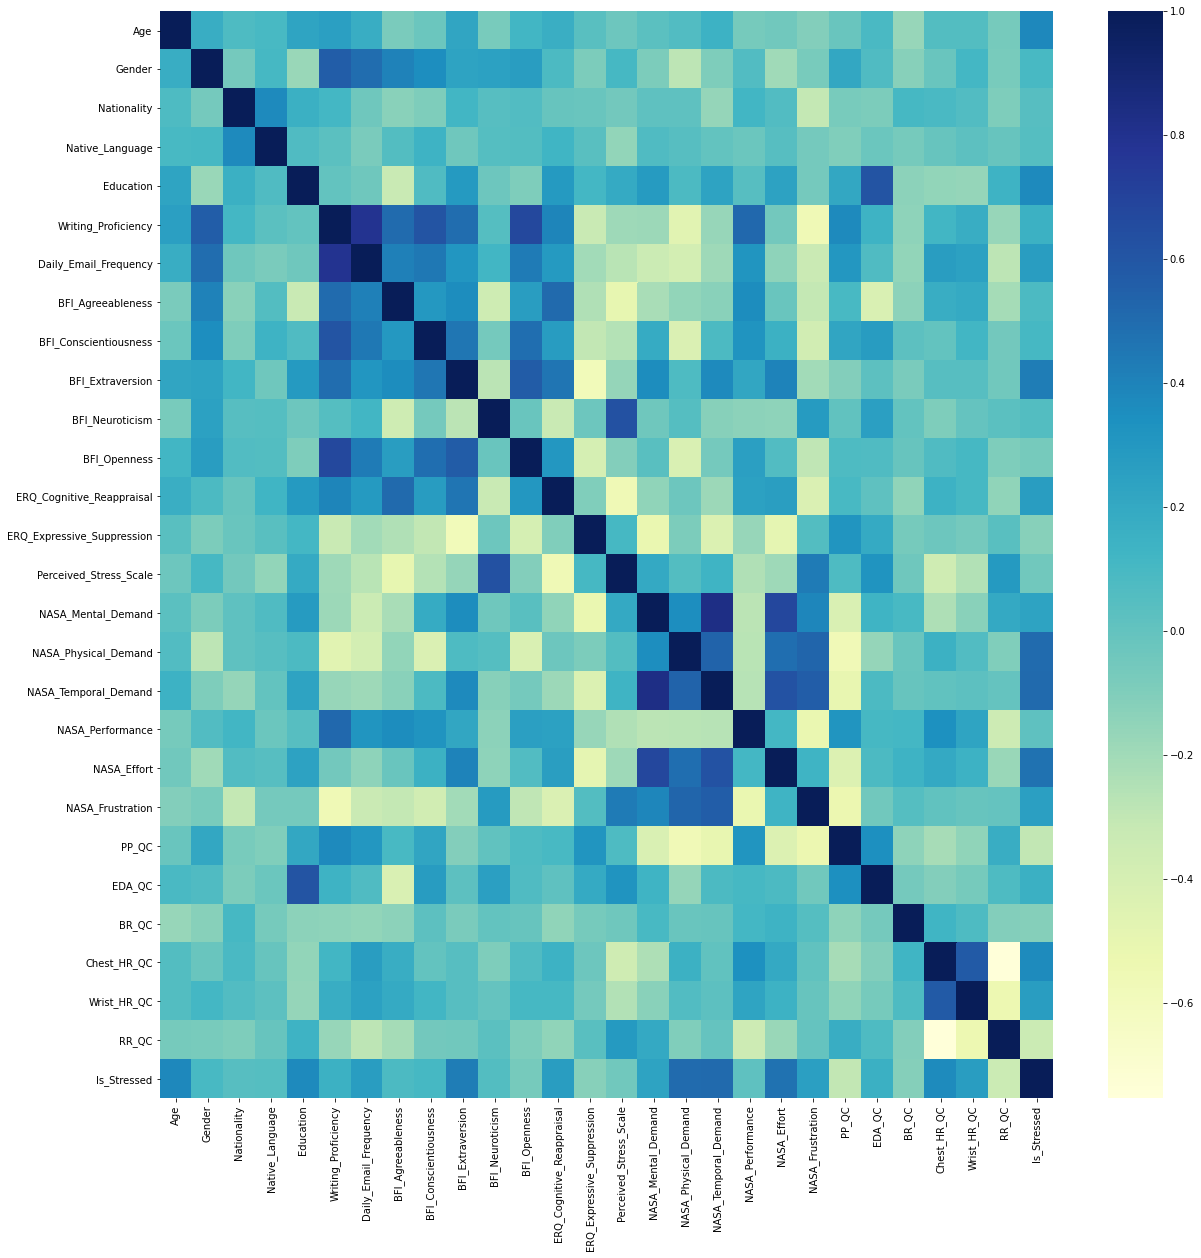

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap="YlGnBu");

In [24]:
corr

,Age,Gender,Nationality,Native_Language,Education,Writing_Proficiency,Daily_Email_Frequency,BFI_Agreeableness,BFI_Conscientiousness,BFI_Extraversion,...,NASA_Performance,NASA_Effort,NASA_Frustration,PP_QC,EDA_QC,BR_QC,Chest_HR_QC,Wrist_HR_QC,RR_QC,Is_Stressed
Age,1.000000,0.174488,0.078818,0.100609,0.231726,0.254065,0.175426,-0.076596,-0.023510,0.219601,...,-0.067789,-0.047551,-0.102936,-0.018513,0.090285,-0.167872,0.059447,0.056384,-0.062059,0.383033
Gender,0.174488,1.000000,-0.057396,0.103075,-0.176648,0.566183,0.499882,0.410811,0.353547,0.233527,...,0.064492,-0.195266,-0.075127,0.207370,0.069779,-0.116724,-0.016002,0.114074,-0.072456,0.099767
Nationality,0.078818,-0.057396,1.000000,0.374201,0.161352,0.112100,-0.040583,-0.125183,-0.094713,0.121101,...,0.119013,0.061889,-0.305088,-0.073601,-0.087013,0.108812,0.089112,0.067836,-0.095181,0.043515
Native_Language,0.100609,0.103075,0.374201,1.000000,0.073987,0.027942,-0.077744,0.059418,0.139242,-0.039452,...,-0.020946,0.041671,-0.059250,-0.100790,-0.021859,-0.065542,-0.007392,0.025359,-0.006895,0.050637
Education,0.231726,-0.176648,0.161352,0.073987,1.000000,0.003839,-0.037143,-0.323372,0.074848,0.290181,...,0.044335,0.244415,-0.059948,0.207228,0.615535,-0.131137,-0.152354,-0.161081,0.138115,0.371589
Writing_Proficiency,0.254065,0.566183,0.112100,0.027942,0.003839,1.000000,0.794324,0.502741,0.611421,0.499555,...,0.516405,-0.052482,-0.555514,0.371378,0.141115,-0.140020,0.116699,0.175199,-0.165091,0.157290
Daily_Email_Frequency,0.175426,0.499882,-0.040583,-0.077744,-0.037143,0.794324,1.000000,0.412631,0.451481,0.313907,...,0.321619,-0.143600,-0.330560,0.305498,0.072254,-0.153791,0.273023,0.247763,-0.280993,0.271205
BFI_Agreeableness,-0.076596,0.410811,-0.125183,0.059418,-0.323372,0.502741,0.412631,1.000000,0.294782,0.357150,...,0.356870,-0.020366,-0.302766,0.101672,-0.411335,-0.132544,0.173780,0.196589,-0.208989,0.082762
BFI_Conscientiousness,-0.023510,0.353547,-0.094713,0.139242,0.074848,0.611421,0.451481,0.294782,1.000000,0.453126,...,0.325429,0.155832,-0.373804,0.220330,0.278230,0.022693,0.006376,0.119490,-0.051848,0.105059
BFI_Extraversion,0.219601,0.233527,0.121101,-0.039452,0.290181,0.499555,0.313907,0.357150,0.453126,1.000000,...,0.217773,0.397950,-0.198975,-0.105131,0.025583,-0.076432,0.043407,0.045184,-0.045462,0.428375
